In [2]:
# Importar las librerías
import pandas as pd                    # Para manejar datos en tablas
import numpy as np                     # Para operaciones matemáticas
import matplotlib.pyplot as plt        # Para hacer gráficos
from sklearn.ensemble import GradientBoostingClassifier  # El modelo de ML
from sklearn.model_selection import train_test_split    # Para dividir datos
from sklearn.preprocessing import LabelEncoder          # Para convertir texto a números
from sklearn.metrics import accuracy_score, classification_report  # Para evaluar

## 📁 PASO 2: Cargar los datos

In [3]:
# Este comando conecta colab con drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/train.csv"
df = pd.read_csv(path)

## 🔍 PASO 3: Explorar los datos

In [5]:
# Ver las primeras filas
print("📋 Primeras 5 filas de los datos:")
print(df.head())

print("\n📊 Información básica:")
print(df.info())

📋 Primeras 5 filas de los datos:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural  

In [6]:
#Revisamos el dataFrame
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Estandarizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Nombres de columnas actualizados:")
print(df.columns.tolist())

Nombres de columnas actualizados:
['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']


In [22]:
 #Identificar si exiten valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [9]:
# Revisar duplicados.
df.duplicated().sum()

np.int64(0)

In [10]:
# Verificar espacios vacíos en columnas de texto
columnas_texto = df.select_dtypes(include=['object']).columns

print("Análisis de espacios vacíos en columnas de texto:")
for col in columnas_texto:
    # Contar espacios vacíos
    espacios_vacios = df[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        print(f"\n{col}: {espacios_vacios} espacios vacíos")

    # Verificar valores únicos (primeros 10)
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos} valores únicos")
    if valores_unicos < 20:
        print(f"Valores: {df[col].value_counts().head(10).to_dict()}")

Análisis de espacios vacíos en columnas de texto:
loan_id: 614 valores únicos
gender: 2 valores únicos
Valores: {'Male': 489, 'Female': 112}
married: 2 valores únicos
Valores: {'Yes': 398, 'No': 213}
dependents: 4 valores únicos
Valores: {'0': 345, '1': 102, '2': 101, '3+': 51}
education: 2 valores únicos
Valores: {'Graduate': 480, 'Not Graduate': 134}
self_employed: 2 valores únicos
Valores: {'No': 500, 'Yes': 82}
property_area: 3 valores únicos
Valores: {'Semiurban': 233, 'Urban': 202, 'Rural': 179}
loan_status: 2 valores únicos
Valores: {'Y': 422, 'N': 192}


In [11]:
# Estadísticas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
df.describe().T

Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## 🎯 PASO 4: Analizar la variable objetivo

In [12]:
# Verificar valores faltantes
print("Valores faltantes por columna:")
valores_faltantes = df.isnull().sum()
for col, faltantes in valores_faltantes.items():
    if faltantes > 0:
        porcentaje = (faltantes / len(df)) * 100
        print(f"   {col}: {faltantes} ({porcentaje:.1f}%)")

if valores_faltantes.sum() == 0:
    print("   ✅ No hay valores faltantes")

Valores faltantes por columna:
   gender: 13 (2.1%)
   married: 3 (0.5%)
   dependents: 15 (2.4%)
   self_employed: 32 (5.2%)
   loanamount: 22 (3.6%)
   loan_amount_term: 14 (2.3%)
   credit_history: 50 (8.1%)


🎯 Variable objetivo (Loan_Status):
   Aprobados (Y): 422 (68.7%)
   Rechazados (N): 192 (31.3%)


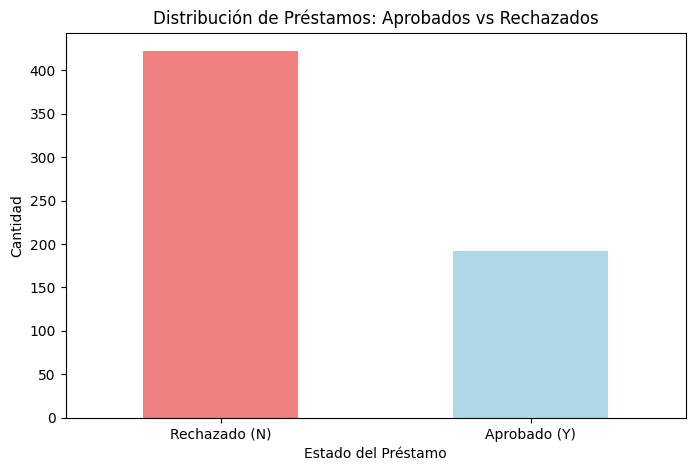


💡 Observación: 69% de los préstamos son aprobados


In [15]:
# Analizar cuántos préstamos fueron aprobados vs rechazados
print("🎯 Variable objetivo (Loan_Status):")
conteo = df['loan_status'].value_counts()
porcentajes = df['loan_status'].value_counts(normalize=True) * 100

print(f"   Aprobados (Y): {conteo['Y']} ({porcentajes['Y']:.1f}%)")
print(f"   Rechazados (N): {conteo['N']} ({porcentajes['N']:.1f}%)")

# Crear un gráfico simple
plt.figure(figsize=(8, 5))
conteo.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Distribución de Préstamos: Aprobados vs Rechazados')
plt.xlabel('Estado del Préstamo')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Rechazado (N)', 'Aprobado (Y)'], rotation=0)
plt.show()

print(f"\n💡 Observación: {porcentajes['Y']:.0f}% de los préstamos son aprobados")

## 🧹 PASO 5: Limpiar los datos

In [20]:
# Crear una copia para no modificar los datos originales
df_limpio = df.copy()

# Definir columnas según tu dataset (nombres en minúsculas)
columnas_categoricas = ['gender', 'married', 'dependents', 'self_employed']
columnas_numericas = ['loanamount', 'loan_amount_term', 'credit_history']

# LIMPIAR VARIABLES CATEGÓRICAS
print("\n🔤 LIMPIANDO VARIABLES CATEGÓRICAS:")
for col in columnas_categoricas:
    if col in df_limpio.columns and df_limpio[col].isnull().sum() > 0:
        valores_faltantes = df_limpio[col].isnull().sum()
        moda = df_limpio[col].mode()[0]
        df_limpio[col] = df_limpio[col].fillna(moda)
        print(f"   ✓ {col}: {valores_faltantes} valores rellenados con '{moda}'")

# LIMPIAR VARIABLES NUMÉRICAS
print("\n🔢 LIMPIANDO VARIABLES NUMÉRICAS:")
for col in columnas_numericas:
    if col in df_limpio.columns and df_limpio[col].isnull().sum() > 0:
        valores_faltantes = df_limpio[col].isnull().sum()
        mediana = df_limpio[col].median()
        df_limpio[col] = df_limpio[col].fillna(mediana)
        print(f"   ✓ {col}: {valores_faltantes} valores rellenados con {mediana}")


🔤 LIMPIANDO VARIABLES CATEGÓRICAS:
   ✓ gender: 13 valores rellenados con 'Male'
   ✓ married: 3 valores rellenados con 'Yes'
   ✓ dependents: 15 valores rellenados con '0'
   ✓ self_employed: 32 valores rellenados con 'No'

🔢 LIMPIANDO VARIABLES NUMÉRICAS:
   ✓ loanamount: 22 valores rellenados con 128.0
   ✓ loan_amount_term: 14 valores rellenados con 360.0
   ✓ credit_history: 50 valores rellenados con 1.0


In [21]:
# Revisamos los NaN si hay
filas_con_nan = df_limpio[df_limpio.isnull().any(axis=1)]

print("Filas que contienen al menos un valor NaN:")
print(filas_con_nan)

# También puedes verificar el total de NaN por columna
print("\nTotal de valores NaN por columna:")
print(df_limpio.isnull().sum())

# O simplemente verificar si hay algún NaN
total_nan = df_limpio.isnull().sum().sum()
print(f"\nTotal de valores NaN en todo el dataset: {total_nan}")

Filas que contienen al menos un valor NaN:
Empty DataFrame
Columns: [loan_id, gender, married, dependents, education, self_employed, applicantincome, coapplicantincome, loanamount, loan_amount_term, credit_history, property_area, loan_status]
Index: []

Total de valores NaN por columna:
loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

Total de valores NaN en todo el dataset: 0


## ⚙️ PASO 6: Preparar datos para el modelo

In [31]:
# Separar características (X) de la variable objetivo (y)
print(" Preparando datos para el modelo...")

# X = características que usaremos para predecir
X = df_limpio.drop(['loan_id', 'loan_status'], axis=1)
# y = lo que queremos predecir (aprobado/rechazado)
y = df_limpio['loan_status']

print(f"\n Datos preparados:")
print(f"   Características (X): {X.shape[1]} columnas, {X.shape[0]} filas")
print(f"   Variable objetivo (y): {y.name}")
print(f"\n Características disponibles:")
for i, col in enumerate(X.columns, 1):
    tipo_dato = "numérico" if X[col].dtype in ['int64', 'float64'] else "categórico"
    print(f"   {i:2d}. {col} ({tipo_dato})")

 Preparando datos para el modelo...

 Datos preparados:
   Características (X): 11 columnas, 614 filas
   Variable objetivo (y): loan_status

 Características disponibles:
    1. gender (categórico)
    2. married (categórico)
    3. dependents (categórico)
    4. education (categórico)
    5. self_employed (categórico)
    6. applicantincome (numérico)
    7. coapplicantincome (numérico)
    8. loanamount (numérico)
    9. loan_amount_term (numérico)
   10. credit_history (numérico)
   11. property_area (categórico)


In [33]:
# Convertir variables categóricas a números
print(" Convirtiendo texto a números...")
print("\n ¿Por qué? Los algoritmos de ML solo entienden números, no texto")

X_numerico = X.copy()
le = LabelEncoder()

# Convertir cada columna de texto a números
for col in X_numerico.columns:
    if X_numerico[col].dtype == 'object':  # Si es texto
        X_numerico[col] = le.fit_transform(X_numerico[col].astype(str))
        print(f"   ✓ {col}: convertido a números")

# Convertir variable objetivo Y/N a 1/0
y_numerico = le.fit_transform(y)
print(f"   ✓ Loan_Status: Y=1, N=0")

print(f"\n Conversión completada")
print(f"   Todas las {X_numerico.shape[1]} características son ahora numéricas")

 Convirtiendo texto a números...

 ¿Por qué? Los algoritmos de ML solo entienden números, no texto
   ✓ gender: convertido a números
   ✓ married: convertido a números
   ✓ dependents: convertido a números
   ✓ education: convertido a números
   ✓ self_employed: convertido a números
   ✓ property_area: convertido a números
   ✓ Loan_Status: Y=1, N=0

 Conversión completada
   Todas las 11 características son ahora numéricas


##  PASO 7: Dividir los datos

In [36]:
# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_numerico, y_numerico,
    test_size=0.2,      # 20% para prueba
    random_state=42,    # Para obtener resultados reproducibles
    stratify=y_numerico # Mantener la misma proporción de aprobados/rechazados
)

print(f"\nDivisión completada:")
print(f"   Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(df_limpio)*100:.0f}%)")
print(f"   Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(df_limpio)*100:.0f}%)")

# Verificar distribución de clases
train_aprobados = (y_train == 1).sum() / len(y_train) * 100
test_aprobados = (y_test == 1).sum() / len(y_test) * 100
print(f"\n Distribución balanceada:")
print(f"   Entrenamiento: {train_aprobados:.1f}% aprobados")
print(f"   Prueba: {test_aprobados:.1f}% aprobados")


División completada:
   Entrenamiento: 491 muestras (80%)
   Prueba: 123 muestras (20%)

 Distribución balanceada:
   Entrenamiento: 68.6% aprobados
   Prueba: 69.1% aprobados


## 🤖 PASO 8: Entrenar el modelo

In [37]:
# Crear y entrenar el modelo

# Crear el modelo con parámetros simples
modelo = GradientBoostingClassifier(
    n_estimators=100,    # Número de 'expertos'
    learning_rate=0.1,   # Velocidad de aprendizaje
    max_depth=3,         # Profundidad de cada 'experto'
    random_state=42      # Para resultados reproducibles
)

print("\n⏳ Entrenando... (esto puede tomar unos segundos)")
modelo.fit(X_train, y_train)
print("¡Modelo entrenado exitosamente!")

print(f"\nEl modelo aprendió de {X_train.shape[0]} casos de entrenamiento")
print(f"Ahora puede hacer predicciones sobre casos nuevos")


⏳ Entrenando... (esto puede tomar unos segundos)
¡Modelo entrenado exitosamente!

El modelo aprendió de 491 casos de entrenamiento
Ahora puede hacer predicciones sobre casos nuevos


## 🔮 PASO 9: Hacer predicciones

In [39]:
# Hacer predicciones en datos de entrenamiento y prueba
print("Haciendo predicciones...")

# Predicciones en entrenamiento (para ver si aprendió bien)
y_train_pred = modelo.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predicciones en prueba (el test real)
y_test_pred = modelo.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n Resultados de predicciones:")
print(f"   Entrenamiento: {len(y_train_pred)} predicciones, {train_accuracy:.1%} de precisión")
print(f"   Prueba: {len(y_test_pred)} predicciones, {test_accuracy:.1%} de precisión")

# Análisis rápido de resultados
diferencia = train_accuracy - test_accuracy
if diferencia > 0.1:  # Si la diferencia es mayor al 10%
    print(f"\n Posible sobreajuste: diferencia de {diferencia:.1%}")
    print("   El modelo memorizó los datos de entrenamiento")
else:
    print(f"\n Buen balance: diferencia de solo {diferencia:.1%}")
    print("   El modelo generalizó bien")

Haciendo predicciones...

 Resultados de predicciones:
   Entrenamiento: 491 predicciones, 90.0% de precisión
   Prueba: 123 predicciones, 79.7% de precisión

 Posible sobreajuste: diferencia de 10.3%
   El modelo memorizó los datos de entrenamiento


## 📈 PASO 10: Evaluar el modelo

In [40]:
# Evaluación detallada del modelo
print("📈 EVALUACIÓN COMPLETA DEL MODELO")
print("=" * 40)

print(f"\n🎯 PRECISIÓN GENERAL: {test_accuracy:.1%}")
print(f"   De cada 100 predicciones, {test_accuracy*100:.0f} son correctas")

# Interpretación de la precisión
if test_accuracy >= 0.8:
    nivel = "EXCELENTE 🏆"
elif test_accuracy >= 0.7:
    nivel = "BUENO 👍"
elif test_accuracy >= 0.6:
    nivel = "ACEPTABLE 👌"
else:
    nivel = "NECESITA MEJORAS 🔧"

print(f"\n📊 Nivel de rendimiento: {nivel}")

# Reporte detallado
print(f"\n📋 REPORTE DETALLADO:")
nombres_clases = ['Rechazado', 'Aprobado']
reporte = classification_report(y_test, y_test_pred,
                              target_names=nombres_clases,
                              output_dict=True)

print(f"\n   RECHAZADOS:")
print(f"   - Precisión: {reporte['Rechazado']['precision']:.1%} (cuando predice rechazo, acierta {reporte['Rechazado']['precision']:.1%})")
print(f"   - Recall: {reporte['Rechazado']['recall']:.1%} (encuentra {reporte['Rechazado']['recall']:.1%} de todos los rechazos reales)")

print(f"\n   APROBADOS:")
print(f"   - Precisión: {reporte['Aprobado']['precision']:.1%} (cuando predice aprobación, acierta {reporte['Aprobado']['precision']:.1%})")
print(f"   - Recall: {reporte['Aprobado']['recall']:.1%} (encuentra {reporte['Aprobado']['recall']:.1%} de todas las aprobaciones reales)")

📈 EVALUACIÓN COMPLETA DEL MODELO

🎯 PRECISIÓN GENERAL: 79.7%
   De cada 100 predicciones, 80 son correctas

📊 Nivel de rendimiento: BUENO 👍

📋 REPORTE DETALLADO:

   RECHAZADOS:
   - Precisión: 74.1% (cuando predice rechazo, acierta 74.1%)
   - Recall: 52.6% (encuentra 52.6% de todos los rechazos reales)

   APROBADOS:
   - Precisión: 81.2% (cuando predice aprobación, acierta 81.2%)
   - Recall: 91.8% (encuentra 91.8% de todas las aprobaciones reales)


In [42]:
# Crear matriz de confusión visual
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

print("🔍 MATRIZ DE CONFUSIÓN (¿Dónde se equivoca el modelo?)")
print("=" * 50)
print(f"\n                 PREDICCIÓN")
print(f"                Rech.  Aprob.")
print(f"REAL  Rechazado   {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"      Aprobado    {cm[1,0]:3d}    {cm[1,1]:3d}")

# Interpretación
print(f"\n💡 Interpretación:")
print(f"    Predicciones correctas: {cm[0,0] + cm[1,1]} de {len(y_test)}")
print(f"    Falsos positivos: {cm[0,1]} (predijo aprobado, era rechazado)")
print(f"    Falsos negativos: {cm[1,0]} (predijo rechazado, era aprobado)")

# ¿Cuál es peor error?
if cm[0,1] > cm[1,0]:
    print(f"\n El modelo tiende a aprobar préstamos que deberían rechazarse")
elif cm[1,0] > cm[0,1]:
    print(f"\n El modelo tiende a rechazar préstamos que deberían aprobarse")
else:
    print(f"\n El modelo tiene errores balanceados")

🔍 MATRIZ DE CONFUSIÓN (¿Dónde se equivoca el modelo?)

                 PREDICCIÓN
                Rech.  Aprob.
REAL  Rechazado    20     18
      Aprobado      7     78

💡 Interpretación:
    Predicciones correctas: 98 de 123
    Falsos positivos: 18 (predijo aprobado, era rechazado)
    Falsos negativos: 7 (predijo rechazado, era aprobado)

 El modelo tiende a aprobar préstamos que deberían rechazarse


## 🔍 PASO 11: Características más importantes

In [45]:
# Analizar qué características son más importantes para el modelo
print("🔍 ¿QUÉ FACTORES SON MÁS IMPORTANTES PARA APROBAR UN PRÉSTAMO?")
print("=" * 60)

# Obtener importancias
importancias = modelo.feature_importances_
nombres_caracteristicas = X.columns

# Crear lista ordenada
caracteristicas_importantes = list(zip(nombres_caracteristicas, importancias))
caracteristicas_importantes.sort(key=lambda x: x[1], reverse=True)

print(f"\n TOP 5 FACTORES MÁS IMPORTANTES:")
print(f"    (Puntuación de 0 a 1, donde 1 = máxima importancia)\n")

for i, (nombre, importancia) in enumerate(caracteristicas_importantes[:5], 1):
    # Crear barra visual
    barra_longitud = int(importancia * 50)  # Escalar a 50 caracteres
    barra = "█" * barra_longitud + "░" * (50 - barra_longitud)

    print(f"{i}. {nombre:20s} │{barra}│ {importancia:.3f}")

# Interpretaciones específicas
factor_principal = caracteristicas_importantes[0][0]
importancia_principal = caracteristicas_importantes[0][1]

print(f"\n💡 INTERPRETACIÓN:")
print(f"  Factor principal: {factor_principal} ({importancia_principal:.1%} de importancia)")

# Interpretaciones por factor
interpretaciones = {
    'Credit_History': 'El historial crediticio es CLAVE - pagar deudas a tiempo es fundamental',
    'LoanAmount': 'La cantidad solicitada importa - préstamos muy altos son más riesgosos',
    'ApplicantIncome': 'Los ingresos del solicitante son un factor importante',
    'CoapplicantIncome': 'Los ingresos del cónyuge/aval también cuentan',
    'Property_Area': 'La ubicación de la propiedad influye en la decisión',
    'Education': 'El nivel educativo afecta la aprobación',
    'Married': 'El estado civil es un factor considerado',
    'Self_Employed': 'Ser autoempleado vs empleado hace diferencia'
}

if factor_principal in interpretaciones:
    print(f"   📝 {interpretaciones[factor_principal]}")

print(f"\n CONSEJO PRÁCTICO:")
print(f"   Para aumentar probabilidades de aprobación, enfócate en:")
for i, (nombre, _) in enumerate(caracteristicas_importantes[:3], 1):
    if nombre in interpretaciones:
        print(f"   {i}. {interpretaciones[nombre]}")

🔍 ¿QUÉ FACTORES SON MÁS IMPORTANTES PARA APROBAR UN PRÉSTAMO?

 TOP 5 FACTORES MÁS IMPORTANTES:
    (Puntuación de 0 a 1, donde 1 = máxima importancia)

1. credit_history       │████████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░│ 0.407
2. loanamount           │████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░│ 0.170
3. applicantincome      │████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░│ 0.162
4. coapplicantincome    │█████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░│ 0.114
5. loan_amount_term     │██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░│ 0.042

💡 INTERPRETACIÓN:
  Factor principal: credit_history (40.7% de importancia)

 CONSEJO PRÁCTICO:
   Para aumentar probabilidades de aprobación, enfócate en:


## 📊 PASO 12: Visualizaciones finales

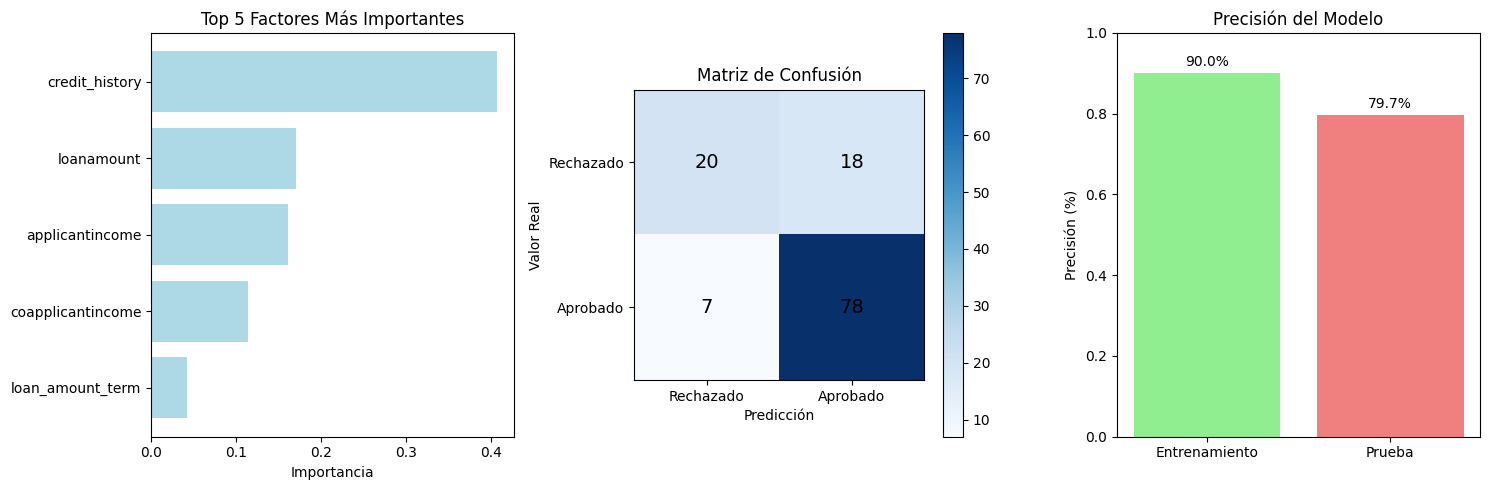

📊 Gráficos generados exitosamente


In [46]:
# Crear gráficos para entender mejor los resultados
plt.figure(figsize=(15, 5))

# Gráfico 1: Importancia de características
plt.subplot(1, 3, 1)
nombres_top5 = [nombre for nombre, _ in caracteristicas_importantes[:5]]
importancias_top5 = [imp for _, imp in caracteristicas_importantes[:5]]

plt.barh(nombres_top5, importancias_top5, color='lightblue')
plt.title('Top 5 Factores Más Importantes')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()  # Invertir para que el más importante esté arriba

# Gráfico 2: Matriz de confusión
plt.subplot(1, 3, 2)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Rechazado', 'Aprobado'])
plt.yticks(tick_marks, ['Rechazado', 'Aprobado'])
plt.ylabel('Valor Real')
plt.xlabel('Predicción')

# Añadir números a la matriz
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=14)

# Gráfico 3: Comparación de precisión
plt.subplot(1, 3, 3)
precisiones = [train_accuracy, test_accuracy]
categorias = ['Entrenamiento', 'Prueba']
colores = ['lightgreen', 'lightcoral']

barras = plt.bar(categorias, precisiones, color=colores)
plt.title('Precisión del Modelo')
plt.ylabel('Precisión (%)')
plt.ylim(0, 1)

# Añadir etiquetas de porcentaje
for barra, precision in zip(barras, precisiones):
    plt.text(barra.get_x() + barra.get_width()/2, barra.get_height() + 0.01,
             f'{precision:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("📊 Gráficos generados exitosamente")

## 🎯 PASO 13: Resumen final y conclusiones

In [49]:
# Resumen ejecutivo del análisis
print("🎉 RESUMEN FINAL DEL ANÁLISIS")
print("=" * 50)

print(f"\n📊 DATOS ANALIZADOS:")
print(f"   • {df.shape[0]} solicitudes de préstamo")
print(f"   • {X.shape[1]} características por solicitud")
print(f"   • {porcentajes['Y']:.0f}% de aprobación histórica")

print(f"\n🤖 MODELO DESARROLLADO:")
print(f"   • Algoritmo: Gradient Boosting")
print(f"   • Precisión: {test_accuracy:.1%}")
print(f"   • Entrenado con {X_train.shape[0]} casos")
print(f"   • Evaluado con {X_test.shape[0]} casos")

print(f"\n🔍 HALLAZGOS PRINCIPALES:")
print(f"   1. {caracteristicas_importantes[0][0]} es el factor más importante ({caracteristicas_importantes[0][1]:.1%})")
print(f"   2. {caracteristicas_importantes[1][0]} es el segundo factor más importante ({caracteristicas_importantes[1][1]:.1%})")
print(f"   3. {caracteristicas_importantes[2][0]} es el tercer factor más importante ({caracteristicas_importantes[2][1]:.1%})")

print(f"\n📈 RENDIMIENTO:")
precision_rechazos = reporte['Rechazado']['precision']
precision_aprobados = reporte['Aprobado']['precision']
print(f"   • Predice aprobaciones con {precision_aprobados:.1%} de precisión")
print(f"   • Predice rechazos con {precision_rechazos:.1%} de precisión")
print(f"   • De cada 100 predicciones, {test_accuracy*100:.0f} son correctas")

print(f"\n💼 APLICACIONES PRÁCTICAS:")
print(f"   ✓ Automatizar evaluación inicial de préstamos")
print(f"   ✓ Identificar factores de riesgo principales")
print(f"   ✓ Acelerar proceso de toma de decisiones")
print(f"   ✓ Reducir sesgos humanos en evaluación")

print(f"\n🚀 SIGUIENTES PASOS:")
print(f"   1. Recopilar más datos para mejorar precisión")
print(f"   2. Probar algoritmos más avanzados")
print(f"   3. Crear nuevas características derivadas")
print(f"   4. Implementar en sistema de producción")

print(f"Tu modelo puede predecir aprobaciones de préstamos con {test_accuracy:.0%} de precisión.")

🎉 RESUMEN FINAL DEL ANÁLISIS

📊 DATOS ANALIZADOS:
   • 614 solicitudes de préstamo
   • 11 características por solicitud
   • 69% de aprobación histórica

🤖 MODELO DESARROLLADO:
   • Algoritmo: Gradient Boosting
   • Precisión: 79.7%
   • Entrenado con 491 casos
   • Evaluado con 123 casos

🔍 HALLAZGOS PRINCIPALES:
   1. credit_history es el factor más importante (40.7%)
   2. loanamount es el segundo factor más importante (17.0%)
   3. applicantincome es el tercer factor más importante (16.2%)

📈 RENDIMIENTO:
   • Predice aprobaciones con 81.2% de precisión
   • Predice rechazos con 74.1% de precisión
   • De cada 100 predicciones, 80 son correctas

💼 APLICACIONES PRÁCTICAS:
   ✓ Automatizar evaluación inicial de préstamos
   ✓ Identificar factores de riesgo principales
   ✓ Acelerar proceso de toma de decisiones
   ✓ Reducir sesgos humanos en evaluación

🚀 SIGUIENTES PASOS:
   1. Recopilar más datos para mejorar precisión
   2. Probar algoritmos más avanzados
   3. Crear nuevas carac